# In class Assignment3: Linear Regression, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [9]:
dataset=pd.read_csv("heart.data.csv")

In [10]:
dataset.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


## Check out if there any missing value and any categorical column

In [11]:
dataset.isnull().sum()

biking           3
smoking          4
heart.disease    1
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   biking         491 non-null    float64
 1   smoking        490 non-null    float64
 2   heart.disease  493 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


<AxesSubplot:xlabel='smoking', ylabel='Count'>

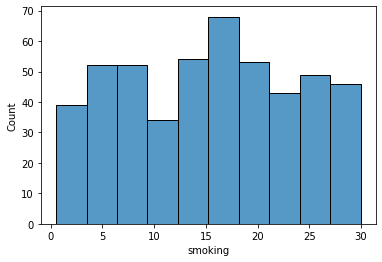

In [14]:
sns.histplot(dataset.smoking)

<AxesSubplot:xlabel='biking', ylabel='Count'>

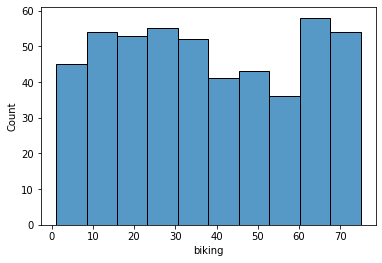

In [16]:
sns.histplot(dataset.biking)

<AxesSubplot:xlabel='heart.disease', ylabel='Count'>

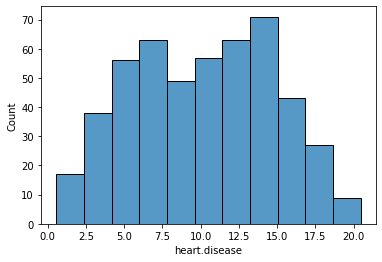

In [18]:
sns.histplot(dataset['heart.disease'])

## Create different copies of your dataset for using in Linear Regression, SVR, DT, RF

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['biking']=imputer.fit_transform(dataset[['biking']])
dataset.isnull().sum()

biking           0
smoking          4
heart.disease    1
dtype: int64

In [21]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['smoking']=imputer.fit_transform(dataset[['smoking']])
dataset.isnull().sum()

biking           0
smoking          0
heart.disease    1
dtype: int64

In [22]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['heart.disease']=imputer.fit_transform(dataset[['heart.disease']])
dataset.isnull().sum()

biking           0
smoking          0
heart.disease    0
dtype: int64

In [24]:
data_LR=dataset
data_SVR=dataset
data_DT=dataset
data_RF=dataset

## 1. Linear Regression

In [26]:
X = data_LR[['biking','smoking']]
y = data_LR[['heart.disease']]

## Splitting the dataset into the Training set and Test set¶

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Training the Linear Regression model on the Training set

In [29]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [30]:
y_pred=regressor.predict(X_test)

In [33]:
regressor.predict([[45.0972,21.38562]])

array([[9.75659682]])

In [34]:
regressor.predict([[8.279743,6.42372]])

array([[14.47643777]])

In [35]:
regressor.predict([[42.34586343,20.74132754]])

array([[10.19401718]])

In [36]:
regressor.predict([[30.77425409,23.61017497]])

array([[13.03113355]])

## validation dataset
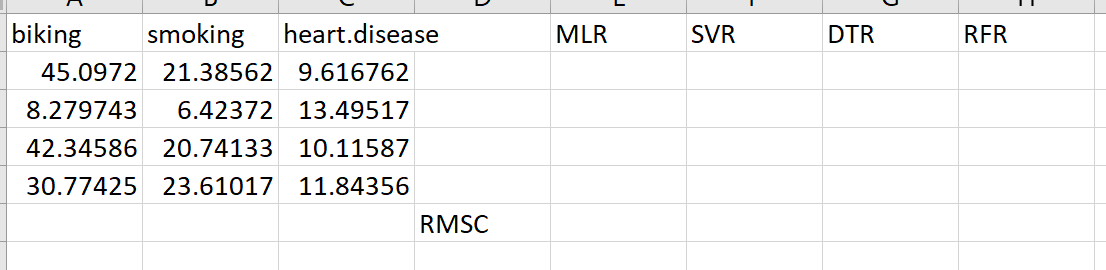!
Fill up the excel

In [ ]:
#Case1

In [ ]:
#Case2

In [ ]:
#Case3

In [ ]:
#Case3

## Evaluating the Model Performance using r2score and rmsc

In [87]:
from sklearn.metrics import r2_score
print("r2-score", r2_score(y_test,y_pred))

r2-score 0.9720255707048382


In [88]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.7435579865944336


# 2. Support Vector Regressor

## Selecting the copied dataset

In [75]:
X = data_SVR[['biking','smoking']]
y = data_SVR[['heart.disease']]

## Splitting the dataset into the Training set and Test set

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Feature Scaling:- X_train and y_train
- X_train = sc_X.fit_transform(X_train)
- y_train = sc_y.fit_transform(y_train)

In [77]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=sc_y.fit_transform(y_train)

## Training the SVR model on the Training set

In [78]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

/Users/joeygladys/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the Test set results

In [98]:
y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))


## Validation dataset
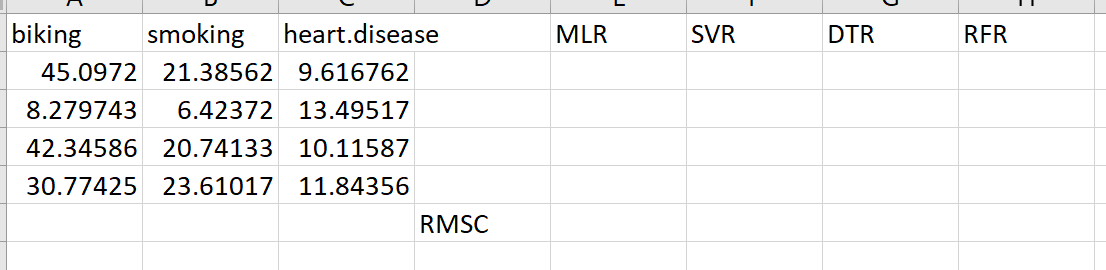
Fill up the excel

In [91]:
#Case1 check the sample
sc_y.inverse_transform(regressor.predict(sc_X.transform([[45.092, 21.385]])).reshape(-1,1))

array([[9.5389144]])

In [92]:
#Case2
sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.279743,6.42372]])).reshape(-1,1))

array([[14.47161849]])

In [93]:
#Case3
sc_y.inverse_transform(regressor.predict(sc_X.transform([[42.34586,20.74133]])).reshape(-1,1))

array([[9.97610421]])

In [94]:
#Case4
sc_y.inverse_transform(regressor.predict(sc_X.transform([[30.77425,23.61017]])).reshape(-1,1))

array([[12.98144796]])

## Evaluating the Model Performance using r2score and rmsc

In [99]:
from sklearn.metrics import r2_score
print("r2-score", r2_score(y_test,y_pred))

r2-score 0.970752846257801


In [100]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.7602843119579633


## 3. Decision Tree Regression

##  Selecting the copied dataset

In [106]:
X = data_DT[['biking','smoking']]
y = data_DT[['heart.disease']]

## Splitting the dataset into the Training set and Test set

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree #tree diagram

## Training the Decision Tree Regression model on the Training set

In [109]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [120]:
y_pred=regressor.predict(X_test)

## Validation dataset
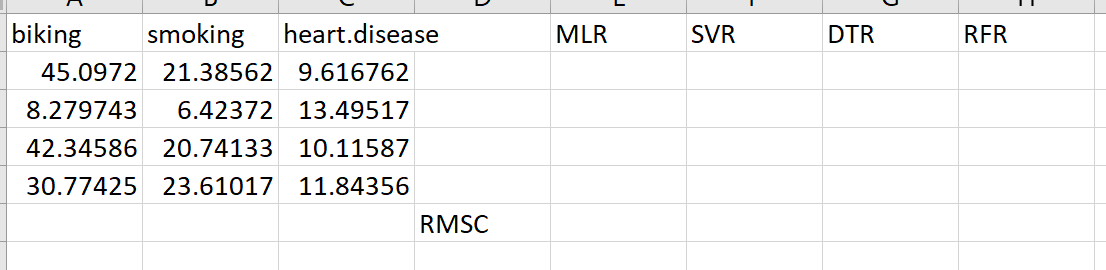
Fill up the excel

In [121]:
#Case1
regressor.predict(([[45.0972,21.38562]]))

array([9.79848336])

In [122]:
#Case2
regressor.predict(([[8.279743,6.42372]]))

array([14.44377369])

In [123]:
#Case3
regressor.predict(([[42.34586,20.74133]]))

array([9.79848336])

In [124]:
#Case4
regressor.predict(([[30.77425,23.61017]]))

array([12.99647582])

## Evaluating the Model Performance using r2score and rmsc

In [125]:
from sklearn.metrics import r2_score
print("r2-score", r2_score(y_test,y_pred))

r2-score 1.0


In [126]:
from sklearn.metrics import mean_squared_error as msc
from math import sqrt
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.0


# 4. Random Forest Regression

## Selecting the copied dataset

In [127]:
X = data_RF[['biking','smoking']]
y = data_RF[['heart.disease']]

## Splitting the dataset into the Training set and Test set

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the Training set

In [129]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X,y)

<ipython-input-129-c0179386adc8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor(n_estimators=20, random_state=0)

## Predicting the Test set results

In [139]:
y_pred=regressor.predict(X_test)

## Validation dataset
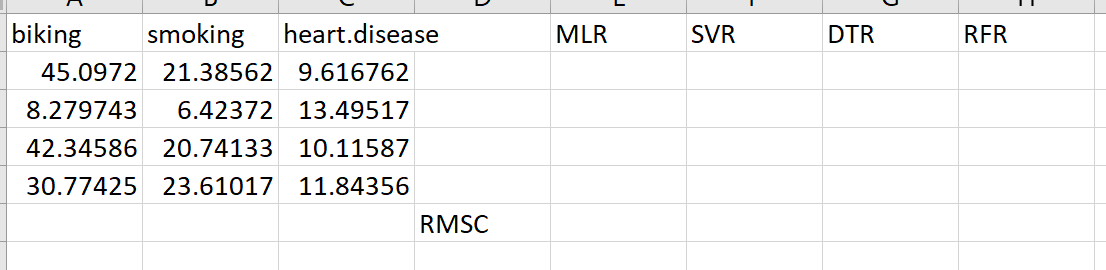

In [140]:
#Case1
regressor.predict(([[45.0972,21.38562]]))

array([9.31145191])

In [141]:
#Case2
regressor.predict(([[8.279743,6.42372]]))

array([14.28740131])

In [142]:
#Case3
regressor.predict(([[42.34586,20.74133]]))

array([9.5566818])

In [143]:
#Case4
regressor.predict(([[30.77425,23.61017]]))

array([13.05347471])

## Evaluating the Model Performance

In [144]:
from sklearn.metrics import r2_score
print("r2-score", r2_score(y_test,y_pred))

r2-score 0.9943419577537885


In [145]:
rms=sqrt(msc(y_test,y_pred))
print("The Mean Square Error is", rms)

The Mean Square Error is 0.33440080792667576
